# Matched Filter Pipeline Demo (EnMAP)

In [1]:
import os
import sys
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal

NOTEBOOK_ROOT = Path.cwd().resolve()
REPO_ROOT = NOTEBOOK_ROOT
while not (REPO_ROOT / 'scripts').exists() and REPO_ROOT.parent != REPO_ROOT:
    REPO_ROOT = REPO_ROOT.parent
if not (REPO_ROOT / 'scripts').exists():
    raise RuntimeError('Could not locate repository root containing scripts directory.')

os.environ.setdefault('PYTHONPATH', str(REPO_ROOT))
if str(REPO_ROOT) not in sys.path:
    sys.path.insert(0, str(REPO_ROOT))

print(f'Notebook root: {NOTEBOOK_ROOT}')
print(f'Repository root: {REPO_ROOT}')

Notebook root: /mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/hygas/notebooks
Repository root: /mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/hygas


In [2]:
SENSOR = 'enmap'

CONFIG = {
    'vnir': Path('/mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/hygas/test_data/enmap/Turkmenistan_20221002/20221002T074833/L1B_20221002T074833Z_002_V010501_20241110T222710Z/ENMAP01-____L1B-DT0000004147_20221002T074833Z_002_V010501_20241110T222710Z-SPECTRAL_IMAGE_VNIR.TIF'),
    'swir': Path('/mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/hygas/test_data/enmap/Turkmenistan_20221002/20221002T074833/L1B_20221002T074833Z_002_V010501_20241110T222710Z/ENMAP01-____L1B-DT0000004147_20221002T074833Z_002_V010501_20241110T222710Z-SPECTRAL_IMAGE_SWIR.TIF'),
    'metadata': Path('/mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/hygas/test_data/enmap/Turkmenistan_20221002/20221002T074833/L1B_20221002T074833Z_002_V010501_20241110T222710Z/ENMAP01-____L1B-DT0000004147_20221002T074833Z_002_V010501_20241110T222710Z-METADATA.XML'),
    'lut': Path('/mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/LUTs/CH4_lut.hdf5'),
    'snr_reference': REPO_ROOT / 'notebooks' / 'outputs' / 'enmap' / 'L1B-DT0000001584_20220712T104302Z_001_V010502_20251017T093724Z' / 'snr_reference_columnwise.npz',
    'output_dir': NOTEBOOK_ROOT / 'outputs' / 'pipeline_demo' / 'enmap',
    'min_wavelength': 2100.0,
    'max_wavelength': 2450.0,
    'k': 1,
}

CONFIG['output_dir'].mkdir(parents=True, exist_ok=True)
CONFIG

{'vnir': PosixPath('/mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/hygas/test_data/enmap/Turkmenistan_20221002/20221002T074833/L1B_20221002T074833Z_002_V010501_20241110T222710Z/ENMAP01-____L1B-DT0000004147_20221002T074833Z_002_V010501_20241110T222710Z-SPECTRAL_IMAGE_VNIR.TIF'),
 'swir': PosixPath('/mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/hygas/test_data/enmap/Turkmenistan_20221002/20221002T074833/L1B_20221002T074833Z_002_V010501_20241110T222710Z/ENMAP01-____L1B-DT0000004147_20221002T074833Z_002_V010501_20241110T222710Z-SPECTRAL_IMAGE_SWIR.TIF'),
 'metadata': PosixPath('/mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/hygas/test_data/enmap/Turkmenistan_20221002/20221002T074833/L1B_20221002T074833Z_002_V010501_20241110T222710Z/ENMAP01-____L1B-DT0000004147_20221002T074833Z_002_V010501_20241110T222710Z-METADATA.XML'),
 'lut': PosixPath('/mnt/d/Lavoro/Assegno_Ricerca_Sapi

In [3]:
from scripts.pipelines import enmap_pipeline

enmap_pipeline.ch4_detection_enmap(
    vnir_file=str(CONFIG['vnir']),
    swir_file=str(CONFIG['swir']),
    metadata_file=str(CONFIG['metadata']),
    lut_file=str(CONFIG['lut']),
    output_dir=str(CONFIG['output_dir']),
    k=CONFIG['k'],
    min_wavelength=CONFIG['min_wavelength'],
    max_wavelength=CONFIG['max_wavelength'],
    snr_reference_path=str(CONFIG['snr_reference'])
)
print('Pipeline run complete.')

Sun Zenith Angle (degrees): 43.0
Mean Water Vapor (g/cm^2): 1.638
Mean Ground Elevation (m): -15.071
Report di elaborazione EnMAP generato in: /mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/hygas/notebooks/outputs/pipeline_demo/enmap/processing_report.txt
Pipeline run complete.


RGB: /mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/hygas/notebooks/outputs/pipeline_demo/enmap/L1B_DT0000004147_002_20221002T074833Z_20221002T074837Z_RGB.tif
Concentration: /mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/hygas/notebooks/outputs/pipeline_demo/enmap/L1B_DT0000004147_002_20221002T074833Z_20221002T074837Z_MF.tif
Uncertainty: /mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/hygas/notebooks/outputs/pipeline_demo/enmap/L1B_DT0000004147_002_20221002T074833Z_20221002T074837Z_MF_uncertainty.tif


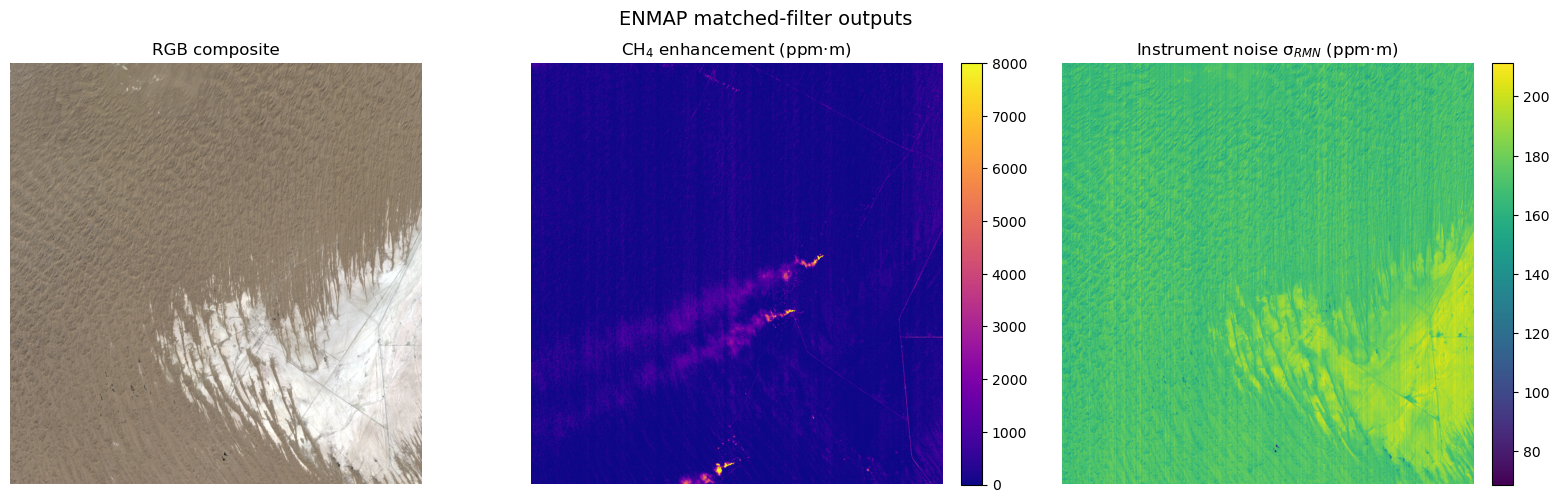

In [4]:
def _find_output(pattern: str):
    matches = sorted(CONFIG['output_dir'].glob(pattern))
    if not matches:
        raise FileNotFoundError(f"No files matching {pattern} found in {CONFIG['output_dir']}")
    return matches[-1]

def _read_raster(path: Path):
    ds = gdal.Open(str(path))
    if ds is None:
        raise RuntimeError(f'Failed to open raster: {path}')
    arr = ds.ReadAsArray().astype(np.float32)
    ds = None
    return arr

rgb_path = _find_output('*_RGB.tif')
conc_path = _find_output('*_MF.tif')
unc_path = _find_output('*_MF_uncertainty.tif')

print('RGB:', rgb_path)
print('Concentration:', conc_path)
print('Uncertainty:', unc_path)

rgb = _read_raster(rgb_path)
concentration = _read_raster(conc_path)
uncertainty = _read_raster(unc_path)

if rgb.ndim == 3:
    rgb_img = np.transpose(rgb, (1, 2, 0))
else:
    rgb_img = rgb

def _normalize_rgb(arr: np.ndarray) -> np.ndarray:
    high = np.quantile(arr, 0.995, axis=(0, 1), keepdims=True)
    high = np.clip(high, 1e-3, None)
    arr = np.clip(arr, 0, high)
    arr = arr / high
    return np.clip(arr, 0, 1)

rgb_disp = _normalize_rgb(rgb_img.astype(np.float32))

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
axes[0].imshow(rgb_disp)
axes[0].set_title('RGB composite')
axes[0].axis('off')

im1 = axes[1].imshow(concentration, cmap='plasma', vmin=0, vmax=8000)
axes[1].set_title('CH$_4$ enhancement (ppm·m)')
plt.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)

im2 = axes[2].imshow(uncertainty, cmap='viridis')
axes[2].set_title('Instrument noise σ$_{RMN}$ (ppm·m)')
plt.colorbar(im2, ax=axes[2], fraction=0.046, pad=0.04)

for ax in axes[1:]:
    ax.axis('off')

fig.suptitle(SENSOR.upper() + ' matched-filter outputs', fontsize=14)
plt.tight_layout()
plt.show()